## Em Working Notebook
### Use for analyses of movie return on investment by month and of IMDB data

In [1]:
#imports
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
budget = pd.read_csv('zippedData/tn.movie_budgets.csv')

In [3]:
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [5]:
#change dates to datetime objects
budget['release_date'] = pd.to_datetime(budget['release_date'])

In [6]:
#remove commas from gross figures
budget = budget.replace(',','', regex=True)

In [7]:
#make this one line if possible
budget['production_budget']= budget['production_budget'].str[1:]
budget['domestic_gross'] = budget['domestic_gross'].str[1:]
budget['worldwide_gross'] = budget['worldwide_gross'].str[1:]

In [8]:
#convert production budget, domestic gross, and worldwide gross to integers from objects
budget[['production_budget', 'domestic_gross', 'worldwide_gross']] = budget[['production_budget', 'domestic_gross', 'worldwide_gross']].astype(np.int64)

In [9]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [10]:
#Create a new column to determine how much a movie made against its budget
budget["return_on_investment"]= budget['worldwide_gross']/budget['production_budget']

In [11]:
#Convert the release date to a date time format
budget['year'] = budget['release_date'].dt.year

In [12]:
#Filter by year after 2010
budget_recent = budget.loc[budget['year']>2010]

In [13]:
budget_recent['return_on_investment'].describe()

count    1920.000000
mean        3.285546
std        11.055955
min         0.000000
25%         0.200260
50%         1.613252
75%         3.635941
max       416.564740
Name: return_on_investment, dtype: float64

In [14]:
#Filter by return on investment greater than 2, considering these to be successful movies
#success = budget_recent.loc[budget['return_on_investment']>1]

In [15]:
#Export success df to .csv
#success.to_csv("zippedData/budget_all_movies.csv")

### Merging the budget dataframe with the IMDB data pulled from SQL

In [16]:
#imports and connect to SQL
import sqlite3
import pandasql


conn = sqlite3.connect('dsc-phase-2-project-v3-main/zippedData/im.db')

In [17]:
#creating a dataframe with the info we want to take from the imdb database
imdb_ratings = pd.read_sql(
    """
    SELECT basics.movie_id, basics.primary_title, basics.original_title, basics.runtime_minutes, basics.genres, ratings.averagerating, ratings.numvotes
    FROM movie_basics as basics
        JOIN movie_ratings as ratings
            USING(movie_id)
    """, conn
)

In [18]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 3.9+ MB


In [19]:
imdb_ratings

,movie_id,primary_title,original_title,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,NaN,None,6.6,5


In [20]:
#bring in csv that was cleaned with the movie budgets
#budget_cleaned = pd.read_csv('zippedData/budget_all_movies.csv')

In [21]:
#removing duplicates from the movie title column in each dataframe before merging them
imdb_ratings = imdb_ratings.drop_duplicates(subset=['primary_title'])
budget_recent = budget_recent.drop_duplicates(subset=['movie'])

In [22]:
budget_recent

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,year
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,0.427892,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,4.153696,2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,6.710167,2015
...,...,...,...,...,...,...,...,...
5761,62,2014-12-31,Stories of Our Lives,15000,0,0,0.000000,2014
5771,72,2015-05-19,Family Motocross,10000,0,0,0.000000,2015
5772,73,2012-01-13,Newlyweds,9000,4584,4584,0.509333,2012
5777,78,2018-12-31,Red 11,7000,0,0,0.000000,2018


In [23]:
imdb_ratings

,movie_id,primary_title,original_title,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,130.0,Drama,8.4,365
73850,tt9913056,Swarm Season,Swarm Season,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,98.0,"Drama,Family",8.7,136


In [24]:
#merge imdb data with our movie budget data
all_movie_data = pd.merge(budget_recent, imdb_ratings, left_on='movie', right_on='primary_title', how='inner')

In [25]:
all_movie_data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,year,movie_id,primary_title,original_title,runtime_minutes,genres,averagerating,numvotes
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624
1,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,0.427892,2019,tt6565702,Dark Phoenix,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",6.0,24451
2,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594
3,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,6.827114,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926
4,9,2017-11-17,Justice League,300000000,229024295,655945209,2.186484,2017,tt0974015,Justice League,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,59,2011-11-25,The Ridges,17300,0,0,0.000000,2011,tt1781935,The Ridges,The Ridges,89.0,"Drama,Horror,Thriller",2.9,127
1587,62,2014-12-31,Stories of Our Lives,15000,0,0,0.000000,2014,tt3973612,Stories of Our Lives,Stories of Our Lives,60.0,Drama,7.5,85
1588,73,2012-01-13,Newlyweds,9000,4584,4584,0.509333,2012,tt1880418,Newlyweds,Newlyweds,95.0,"Comedy,Drama",6.4,1436
1589,78,2018-12-31,Red 11,7000,0,0,0.000000,2018,tt7837402,Red 11,Red 11,77.0,"Horror,Sci-Fi,Thriller",5.6,43


In [26]:
#Checking for duplicates of movie titles in our dataset that we will use going forward for analyses
all_movie_data['movie'].duplicated().value_counts()

False    1591
Name: movie, dtype: int64

### Analysis of movie success depending on the month of the year, season

In [27]:
#import mathplotlib
import matplotlib.pyplot as plt

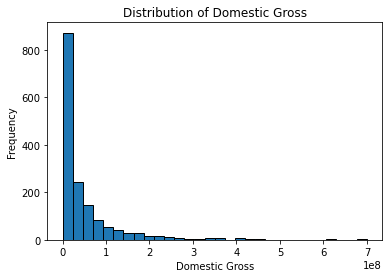

In [28]:
#Histogram of domestic gross
plt.hist(all_movie_data['domestic_gross'], bins=30, edgecolor='black')
plt.xlabel('Domestic Gross')
plt.ylabel('Frequency')
plt.title('Distribution of Domestic Gross')
plt.show()

In [29]:
#Create new column for month
all_movie_data['release_date'] = pd.to_datetime(all_movie_data['release_date'])
all_movie_data['release_month'] = all_movie_data['release_date'].dt.month

In [30]:
all_movie_data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,year,movie_id,primary_title,original_title,runtime_minutes,genres,averagerating,numvotes,release_month
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624,5
1,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,0.427892,2019,tt6565702,Dark Phoenix,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",6.0,24451,6
2,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594,5
3,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,6.827114,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926,4
4,9,2017-11-17,Justice League,300000000,229024295,655945209,2.186484,2017,tt0974015,Justice League,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,59,2011-11-25,The Ridges,17300,0,0,0.000000,2011,tt1781935,The Ridges,The Ridges,89.0,"Drama,Horror,Thriller",2.9,127,11
1587,62,2014-12-31,Stories of Our Lives,15000,0,0,0.000000,2014,tt3973612,Stories of Our Lives,Stories of Our Lives,60.0,Drama,7.5,85,12
1588,73,2012-01-13,Newlyweds,9000,4584,4584,0.509333,2012,tt1880418,Newlyweds,Newlyweds,95.0,"Comedy,Drama",6.4,1436,1
1589,78,2018-12-31,Red 11,7000,0,0,0.000000,2018,tt7837402,Red 11,Red 11,77.0,"Horror,Sci-Fi,Thriller",5.6,43,12


#### Noticed a significant outlier, a movie called "The Gallows"

In [31]:
#The Gallows data
all_movie_data.loc[all_movie_data["movie"]=="The Gallows"]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,year,movie_id,primary_title,original_title,runtime_minutes,genres,averagerating,numvotes,release_month
1551,80,2015-07-10,The Gallows,100000,22764410,41656474,416.56474,2015,tt2309260,The Gallows,The Gallows,81.0,"Horror,Mystery,Thriller",4.2,17763,7


In [32]:
#drop outlier before we do analysis
movie_title_to_drop = 'The Gallows'
all_movie_data = all_movie_data.drop(
    all_movie_data[all_movie_data['movie'] == movie_title_to_drop].index,
    axis=0)

### Use this bar chart for showing All Movies return on investment by month

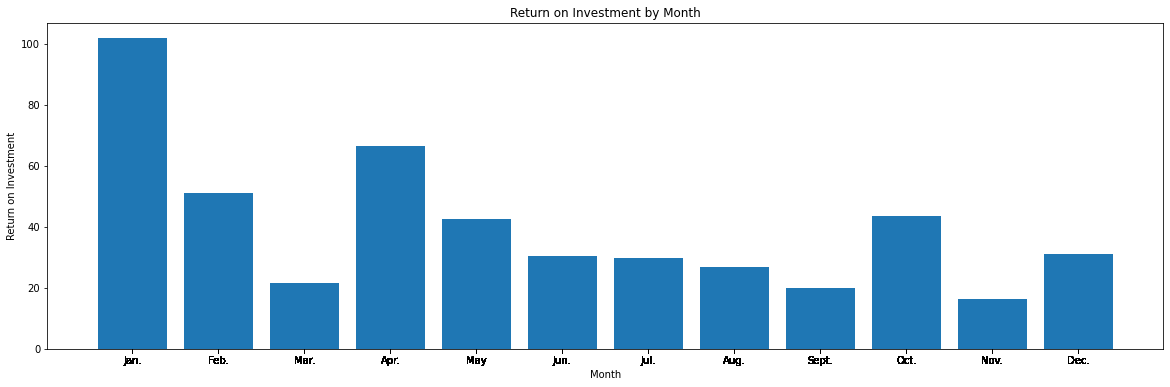

In [33]:
# Bar chart of return on investment by month
plt.figure(figsize=(20, 6))
plt.bar(all_movie_data['release_month'], all_movie_data['return_on_investment'])

month_labels = {1: 'Jan.', 2: 'Feb.', 3: 'Mar.', 4: 'Apr.', 5: 'May', 6: 'Jun.', 7: 'Jul.', 8: 'Aug.', 9: 'Sept.', 10: 'Oct.', 11: 'Nov.', 12: 'Dec.'}
x_labels = [month_labels.get(month, str(month)) for month in all_movie_data['release_month']]
plt.xlabel('Month')
plt.ylabel('Return on Investment')
plt.title('Return on Investment by Month')
plt.xticks(all_movie_data['release_month'], x_labels)

plt.show()

In [34]:
all_movie_data['return_on_investment'].describe()

count    1590.000000
mean        3.157395
std         5.849693
min         0.000000
25%         0.280618
50%         1.697085
75%         3.744135
max       101.759490
Name: return_on_investment, dtype: float64

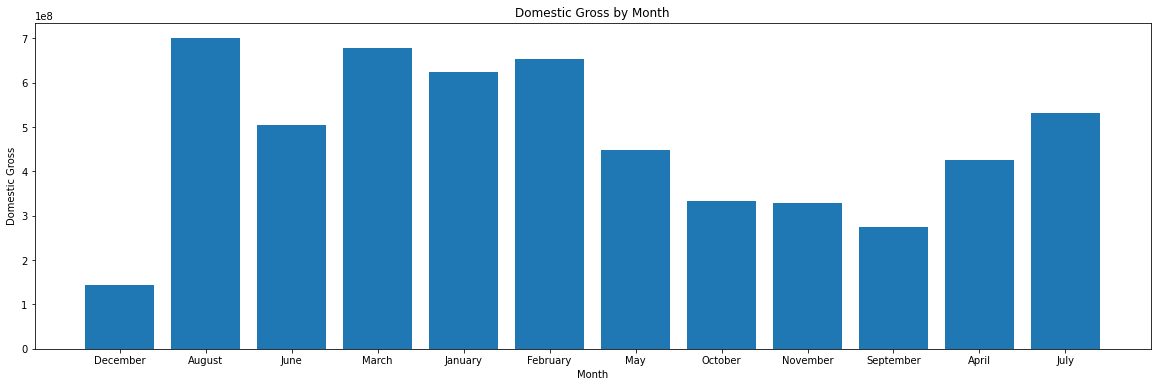

In [35]:
# Bar chart of domestic gross $ by month
plt.figure(figsize=(20, 6))
plt.bar(all_movie_data['release_month'], all_movie_data['domestic_gross'])

plt.xlabel('Month')
plt.ylabel('Domestic Gross')
plt.title('Domestic Gross by Month')

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(all_movie_data['release_month'].unique(), month_names)

plt.show()

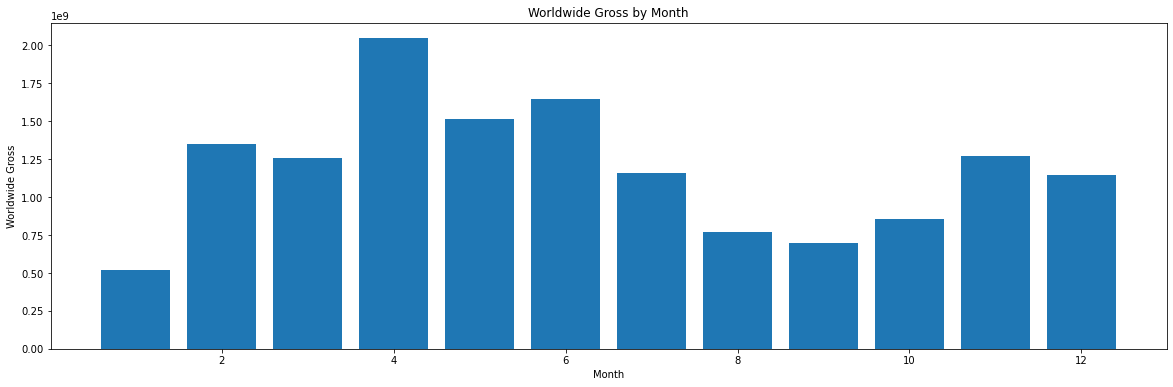

In [36]:
# Bar chart of domestic gross $ by month
plt.figure(figsize=(20, 6))
plt.bar(all_movie_data['release_month'], all_movie_data['worldwide_gross'])

plt.xlabel('Month')
plt.ylabel('Worldwide Gross')
plt.title('Worldwide Gross by Month')


plt.show()

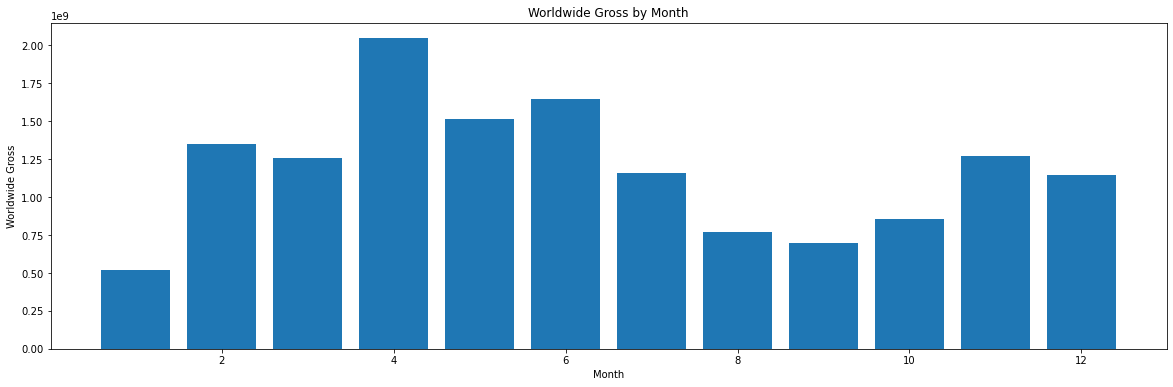

In [37]:
# Bar chart of domestic gross $ by month
plt.figure(figsize=(20, 6))
plt.bar(all_movie_data['release_month'], all_movie_data['worldwide_gross'])

plt.xlabel('Month')
plt.ylabel('Worldwide Gross')
plt.title('Worldwide Gross by Month')

plt.show()

### Some statistical testing for return on investment based on release month of the movie

In [38]:
mean_by_month = all_movie_data.groupby('release_month')['return_on_investment'].mean()
mean_by_month

release_month
1     4.575492
2     3.309353
3     2.477162
4     3.527193
5     2.987794
6     3.540071
7     4.062378
8     2.608681
9     2.559065
10    3.924955
11    3.113364
12    1.994744
Name: return_on_investment, dtype: float64

In [39]:
# One-way ANOVA
result = stats.f_oneway(
    all_movie_data[all_movie_data['release_month'] == 1]['return_on_investment'],
    all_movie_data[all_movie_data['release_month'] == 2]['return_on_investment'],
    all_movie_data[all_movie_data['release_month'] == 3]['return_on_investment'],
    all_movie_data[all_movie_data['release_month'] == 4]['return_on_investment'],
    all_movie_data[all_movie_data['release_month'] == 5]['return_on_investment'],
    all_movie_data[all_movie_data['release_month'] == 6]['return_on_investment'],
    all_movie_data[all_movie_data['release_month'] == 7]['return_on_investment'],
    all_movie_data[all_movie_data['release_month'] == 8]['return_on_investment'],
    all_movie_data[all_movie_data['release_month'] == 9]['return_on_investment'],
    all_movie_data[all_movie_data['release_month'] == 10]['return_on_investment'],
    all_movie_data[all_movie_data['release_month'] == 11]['return_on_investment'],
    all_movie_data[all_movie_data['release_month'] == 12]['return_on_investment']
)

result


F_onewayResult(statistic=2.256719500977848, pvalue=0.010081449830543286)

#### This shows us that there is a signficant difference between the months, but not which months. To figure that out, we need to do post-hoc tests.

In [40]:
#One-way ANOVA
model = ols('return_on_investment ~ C(release_month)', data=all_movie_data).fit()
anova_table = sm.stats.anova_lm(model)

print("ANOVA Table:")
print(anova_table)

#Tukey HSD post hoc test
tukey_result = pairwise_tukeyhsd(all_movie_data['return_on_investment'], all_movie_data['release_month'])

print("Tukey HSD Post Hoc Test:")
print(tukey_result)


ANOVA Table:
                      df        sum_sq    mean_sq        F    PR(>F)
C(release_month)    11.0    842.120882  76.556444  2.25672  0.010081
Residual          1578.0  53531.716382  33.923775      NaN       NaN
Tukey HSD Post Hoc Test:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -1.2661    0.9 -3.8502  1.3179  False
     1      3  -2.0983 0.1747 -4.5377   0.341  False
     1      4  -1.0483    0.9 -3.5411  1.4446  False
     1      5  -1.5877 0.6666 -4.1829  1.0075  False
     1      6  -1.0354    0.9 -3.5684  1.4975  False
     1      7  -0.5131    0.9 -3.0413  2.0151  False
     1      8  -1.9668  0.296 -4.4681  0.5345  False
     1      9  -2.0164 0.2324 -4.4701  0.4372  False
     1     10  -0.6505    0.9 -3.0796  1.7785  False
     1     11  -1.4621 0.7105 -3.9387  1.0144  False
     1     12  -2.5807 0.0168 -4.9241 -0.2374   True
     2      3

#### We see a significant difference on return on investment between January and December only even though the pvalue we got from the initial ANOVA was less (0.01) than alpha (0.05). This could be due to sample size of the individual months or due to the fact that the pvalues in the pairwise Tukey HSD are adjusted to adjust for the bias of doing many statistical tests. 

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     return_on_investment   R-squared:                       0.015
Model:                              OLS   Adj. R-squared:                  0.009
Method:                   Least Squares   F-statistic:                     2.257
Date:                  Wed, 02 Aug 2023   Prob (F-statistic):             0.0101
Time:                          11:58:54   Log-Likelihood:                -5051.8
No. Observations:                  1590   AIC:                         1.013e+04
Df Residuals:                      1578   BIC:                         1.019e+04
Df Model:                            11                                         
Covariance Type:              nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.5755      0.568      8.050      0.000       3.461       5.690
C(release_month)[T.2]     -1.2661      0.789     -1.604      0.109      -2.815       0.282
C(release_month)[T.3]     -2.0983      0.745     -2.816      0.005      -3.560      -0.636
C(release_month)[T.4]     -1.0483      0.762     -1.376      0.169      -2.542       0.446
C(release_month)[T.5]     -1.5877      0.793     -2.002      0.045      -3.143      -0.032
C(release_month)[T.6]     -1.0354      0.774     -1.338      0.181      -2.553       0.483
C(release_month)[T.7]     -0.5131      0.772     -0.664      0.507      -2.028       1.002
C(release_month)[T.8]     -1.9668      0.764     -2.574      0.010      -3.466      -0.468
C(release_month)[T.9]     -2.0164      0.750     -2.690      0.007      -3.487      -0.546
C(release_month)[T.10]    -0.6505      0.742     -0.877      0.381      -2.106       0.805
C(release_month)[T.11]    -1.4621      0.757     -1.932      0.053      -2.946       0.022
C(release_month)[T.12]    -2.5807      0.716     -3.605      0.000      -3.985      -1.176
==============================================================================
Omnibus:                     2061.914   Durbin-Watson:                   0.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           413964.204
Skew:                           6.934   Prob(JB):                         0.00
Kurtosis:                      80.821   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

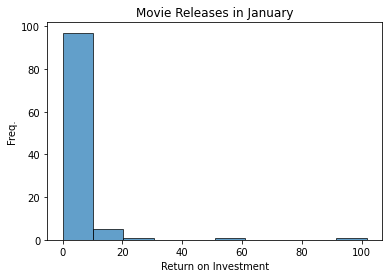

In [42]:
january_data = all_movie_data.loc[all_movie_data['release_month'] == 1]

# Create the histogram
plt.hist(january_data['return_on_investment'], bins=10, alpha=0.7, edgecolor='black')

plt.xlabel('Return on Investment')
plt.ylabel('Freq.')
plt.title('Movie Releases in January')

plt.show()

#### If you run the above histogram for all the months, you can see that generally they are not normally distributed. 

In [43]:
#t test comparing one month to the rest of the months combined
alpha = 0.05
january = all_movie_data.loc[all_movie_data['release_month']==10]
other_months = all_movie_data.loc[all_movie_data['release_month']!=10]

In [44]:
statistic, pvalue = stats.ttest_ind(january['return_on_investment'], other_months['return_on_investment'], equal_var=False)
pvalue / 2

0.089627635116844

In [45]:
t_statistic, p_value = stats.ttest_ind(january['return_on_investment'], other_months['return_on_investment'], equal_var=False)
pvalue

0.179255270233688

In [46]:
winter = all_movie_data.loc[all_movie_data['release_month'].isin([1, 2, 12])]
spring = all_movie_data.loc[all_movie_data['release_month'].isin([3, 4, 5])]
summer = all_movie_data.loc[all_movie_data['release_month'].isin([6, 7, 8])]
fall = all_movie_data.loc[all_movie_data['release_month'].isin([9, 10, 11])]

In [47]:
all_movie_data['season'] = all_movie_data['release_month'].map({
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'
})

In [48]:
all_movie_data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,year,movie_id,primary_title,original_title,runtime_minutes,genres,averagerating,numvotes,release_month,season
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624,5,Spring
1,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,0.427892,2019,tt6565702,Dark Phoenix,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",6.0,24451,6,Summer
2,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594,5,Spring
3,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,6.827114,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926,4,Spring
4,9,2017-11-17,Justice League,300000000,229024295,655945209,2.186484,2017,tt0974015,Justice League,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135,11,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,59,2011-11-25,The Ridges,17300,0,0,0.000000,2011,tt1781935,The Ridges,The Ridges,89.0,"Drama,Horror,Thriller",2.9,127,11,Fall
1587,62,2014-12-31,Stories of Our Lives,15000,0,0,0.000000,2014,tt3973612,Stories of Our Lives,Stories of Our Lives,60.0,Drama,7.5,85,12,Winter
1588,73,2012-01-13,Newlyweds,9000,4584,4584,0.509333,2012,tt1880418,Newlyweds,Newlyweds,95.0,"Comedy,Drama",6.4,1436,1,Winter
1589,78,2018-12-31,Red 11,7000,0,0,0.000000,2018,tt7837402,Red 11,Red 11,77.0,"Horror,Sci-Fi,Thriller",5.6,43,12,Winter


In [49]:
#One-way ANOVA for return on investment based on season that the movie is released in 
model = ols('return_on_investment ~ C(season)', data=all_movie_data).fit()
anova_table = sm.stats.anova_lm(model)

print("ANOVA Table:")
print(anova_table)

#Tukey HSD post hoc test
tukey_result = pairwise_tukeyhsd(all_movie_data['return_on_investment'], all_movie_data['season'])

print("Tukey HSD Post Hoc Test:")
print(tukey_result)

ANOVA Table:
               df        sum_sq    mean_sq         F    PR(>F)
C(season)     3.0     38.611457  12.870486  0.375679  0.770563
Residual   1586.0  54335.225806  34.259285       NaN       NaN
Tukey HSD Post Hoc Test:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  Fall Spring  -0.2331    0.9 -1.2881  0.822  False
  Fall Summer   0.1785    0.9 -0.8853 1.2423  False
  Fall Winter  -0.1607    0.9 -1.2102 0.8887  False
Spring Summer   0.4115 0.7392 -0.6764 1.4994  False
Spring Winter   0.0723    0.9 -1.0016 1.1462  False
Summer Winter  -0.3392 0.8329 -1.4217 0.7433  False
---------------------------------------------------


#### Again, we fail to reject the null hypothesis because the pvalue for each pairwise analysis is greater than alpha.

## Statistical tests for IMDB ratings

In [50]:
all_movie_data.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,year,movie_id,primary_title,original_title,runtime_minutes,genres,averagerating,numvotes,release_month,season
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624,5,Spring
1,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,0.427892,2019,tt6565702,Dark Phoenix,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",6.0,24451,6,Summer
2,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594,5,Spring
3,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,6.827114,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926,4,Spring
4,9,2017-11-17,Justice League,300000000,229024295,655945209,2.186484,2017,tt0974015,Justice League,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135,11,Fall


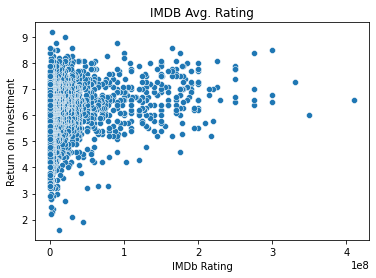

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

#scatterplot for IMDB rating based on production budget
sns.scatterplot(x='production_budget', y='averagerating', data=all_movie_data)

plt.xlabel('IMDb Rating')
plt.ylabel('Return on Investment')
plt.title('IMDB Avg. Rating')

plt.show()

In [52]:
#find slope 'm'
def slope(x, y):
    rho = np.corrcoef(x, y)[0][1]
    s_y = y.std()
    s_x = x.std()

    m = rho * s_y / s_x
    return m
    
m = slope(all_movie_data['production_budget'], all_movie_data['averagerating'])

In [53]:
#find intercept 'c'
def intercept(m, x, y):
    y_mean = y.mean()
    x_mean = x.mean()

    # calculating intercept estimate
    c = y_mean - m * x_mean
    return c
    
c = intercept(m, all_movie_data['production_budget'], all_movie_data['averagerating'])

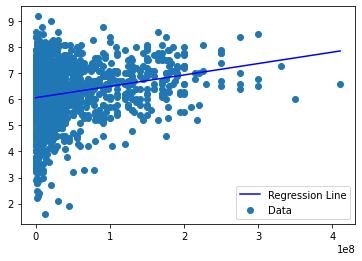

In [54]:
#Plotting the line
def best_fit(x, y):
    # Create a scatter plot of x vs. y
    fig, ax = plt.subplots()
    ax.scatter(x, y, label="Data")

    # Calculate coefficient and intercept
    m = slope(x, y)
    c = intercept(m, x, y)
    
    # Plot line created by coefficient and intercept
    regression_line = m * x + c
    ax.plot(x, regression_line, label= "Regression Line", color='blue')
    ax.legend()
    
best_fit(all_movie_data['production_budget'], all_movie_data['averagerating'])

In [55]:
X = all_movie_data['production_budget']
Y = all_movie_data['averagerating']
X_plus_c = sm.add_constant(X)
lmmodel = sm.OLS(Y, X_plus_c).fit()

In [56]:
lmmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          averagerating   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     75.33
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           9.71e-18
Time:                        11:58:55   Log-Likelihood:                -2383.2
No. Observations:                1590   AIC:                             4770.
Df Residuals:                    1588   BIC:                             4781.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.0677      0.034    181.049      0.000       6.002       6.133
production_budget  4.377e-09   5.04e-10      8.679      0.000    3.39e-09    5.37e-09
==============================================================================
Omnibus:                      100.525   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.793
Skew:                          -0.607   Prob(JB):                     2.17e-27
Kurtosis:                       3.617   Cond. No.                     8.19e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.19e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
endog = Y
exog = sm.add_constant(X)
lin_reg_model = sm.OLS(endog, exog)

In [58]:
lin_model = lin_reg_model.fit()

In [59]:
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          averagerating   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     75.33
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           9.71e-18
Time:                        11:58:56   Log-Likelihood:                -2383.2
No. Observations:                1590   AIC:                             4770.
Df Residuals:                    1588   BIC:                             4781.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.0677      0.034    181.049      0.000       6.002       6.133
production_budget  4.377e-09   5.04e-10      8.679      0.000    3.39e-09    5.37e-09
==============================================================================
Omnibus:                      100.525   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.793
Skew:                          -0.607   Prob(JB):                     2.17e-27
Kurtosis:                       3.617   Cond. No.                     8.19e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.19e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
model2 = sm.OLS(Y, sm.add_constant(X)).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          averagerating   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     75.33
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           9.71e-18
Time:                        11:58:56   Log-Likelihood:                -2383.2
No. Observations:                1590   AIC:                             4770.
Df Residuals:                    1588   BIC:                             4781.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.0677      0.034    181.049      0.000       6.002       6.133
production_budget  4.377e-09   5.04e-10      8.679      0.000    3.39e-09    5.37e-09
==============================================================================
Omnibus:                      100.525   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.793
Skew:                          -0.607   Prob(JB):                     2.17e-27
Kurtosis:                       3.617   Cond. No.                     8.19e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.19e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Horror

#### Running linear regression for production budget vs. imdb ratings for only horror movies

In [61]:
horror = pd.read_csv('zippedData/horror.csv')

In [64]:
#find slope 'm'
def slope(x, y):
    rho = np.corrcoef(x, y)[0][1]
    s_y = y.std()
    s_x = x.std()

    m = rho * s_y / s_x
    return m
    
m = slope(horror['production_budget'], horror['averagerating'])

In [65]:
#find intercept 'c'
def intercept(m, x, y):
    y_mean = y.mean()
    x_mean = x.mean()

    # calculating intercept estimate
    c = y_mean - m * x_mean
    return c
    
c = intercept(m, horror['production_budget'], horror['averagerating'])

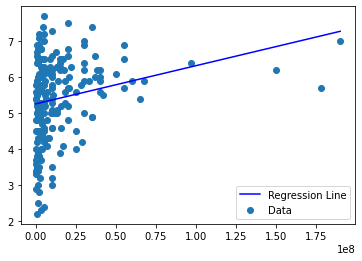

In [66]:
#Plotting the line
def best_fit(x, y):
    # Create a scatter plot of x vs. y
    fig, ax = plt.subplots()
    ax.scatter(x, y, label="Data")

    # Calculate coefficient and intercept
    m = slope(x, y)
    c = intercept(m, x, y)
    
    # Plot line created by coefficient and intercept
    regression_line = m * x + c
    ax.plot(x, regression_line, label= "Regression Line", color='blue')
    ax.legend()
    
best_fit(horror['production_budget'], horror['averagerating'])

In [67]:
X = horror['production_budget']
Y = horror['averagerating']
X_plus_c = sm.add_constant(X)
lmmodel_horror = sm.OLS(Y, X_plus_c).fit()

In [68]:
lmmodel_horror.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          averagerating   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     11.32
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           0.000919
Time:                        12:01:36   Log-Likelihood:                -309.26
No. Observations:                 204   AIC:                             622.5
Df Residuals:                     202   BIC:                             629.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.2624      0.089     59.184      0.000       5.087       5.438
production_budget  1.062e-08   3.16e-09      3.364      0.001     4.4e-09    1.68e-08
==============================================================================
Omnibus:                        7.828   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                8.136
Skew:                          -0.487   Prob(JB):                       0.0171
Kurtosis:                       2.902   Cond. No.                     3.23e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""